<a href="https://www.kaggle.com/code/arkabarua173/regression-of-abalone-age?scriptVersionId=175771396" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color: #092635;
            box-sizing: border-box;
            color: #FAF5EF;
            display:fill;
            padding: 10px 20px;
            text-wrap: balance;
            border-radius:8px;
            border: 2px solid #FAF5EF">
    <h1 style="font-family: Arial; font-size: 28pt;"><b>Abalone Age Regression Problem</b></h1>
    
<h4 style="font-family: Arial; font-size: 16pt;">📌 <b>Objective:</b></h4>
<ul><li style='font-size: 12pt;'>Predicting the age of Abalone</li></ul>

<h4 style="font-family: Arial; font-size: 16pt;">📄 <b>Dataset Description:</b></h4>
<ul>
    <li style='font-size: 12pt;'><b>Sex: </b>Sex of the Abalone - Male(M), Female(F), Infant(I)</li>
    <li style='font-size: 12pt;'><b>Length: </b>The length of the abalone in millimeters (mm).</li>
    <li style='font-size: 12pt;'><b>Diameter: </b>The diameter of the abalone in millimeters (mm).</li>
    <li style='font-size: 12pt;'><b>Height: </b> The height of the abalone in millimeters (mm).</li>
    <li style='font-size: 12pt;'><b>Whole Weight: </b>The whole weight of the abalone in grams (g).</li>
    <li style='font-size: 12pt;'><b>Whole weight.1: </b>The weight of the meat of the abalone in grams (g). Shucked Weight in the original dataset.</li>
    <li style='font-size: 12pt;'><b>Whole weight.2: </b>The weight of the gut (viscera) of the abalone after bleeding in grams (g). Viscera Weight in the original dataset.</li>
    <li style='font-size: 12pt;'><b>Shell Weight: </b>The weight of the abalone's shell after being dried in grams (g).</li>
    <li style='font-size: 12pt;'><b>Rings: </b>The number of rings on the shell, which is a proxy for the age of the abalone.</li>
</ul>

<h4 style="font-family: Arial; font-size: 16pt;">🔨 <b>Data Preprocessing</b></h4>
<ul>
    <li style='font-size: 12pt;'><b>RobustScaler</b> is used for continous numerical values.</li>
    <li style='font-size: 12pt;'><b>One Hot Encoder</b> used for categorical value (In this dataset (Sex)).</li>
</ul>

<h4 style="font-family: Arial; font-size: 16pt;">🤖 <b>Models Used:</b></h4>
<ol>
    <li style='font-size: 12pt;'>XGBoost</li>
    <li style='font-size: 12pt;'>CatBoost</li>
    <li style='font-size: 12pt;'>LightGBM</li>
    <li style='font-size: 12pt;'>Voting Regressor</li>
</ol>

<b>The evaluation metric used is Root Mean Squared Logarithmic Error.</b>
</div>

<div style="background-color: #092635;
            box-sizing: border-box;
            color: #FAF5EF;
            display:fill;
            padding: 10px 20px;
            text-wrap: balance;
            border-radius:8px;
            border: 2px solid #FAF5EF">
<a id = "table-of-content"></a>
<h3 style="font-family: Arial; font-size: 16pt;">📋 <b>Table of Content</b></h3>
    
<ol style="color: #FAF5EF">

<li> <a href="#import" style="color: #FAF5EF;">Importing Libraries</a></li>
<li> <a href="#dataset" style="color: #FAF5EF;">Loading Dataset</a></li>
<li> <a href="#basic" style="color: #FAF5EF;">Basic Data Exploration</a></li>
<li> <a href="#viz" style="color: #FAF5EF;">Data Viz</a></li>
<li> <a href="#split" style="color: #FAF5EF;">Data spliting</a></li>
<li> <a href="#process" style="color: #FAF5EF;">Data Preprocessing</a></li>
<li> <a href="#xgb" style="color: #FAF5EF;">XGBoost</a></li>
<li> <a href="#cat" style="color: #FAF5EF;">CatBoost</a></li>
<li> <a href="#light" style="color: #FAF5EF;">LightGBM</a></li>
<li> <a href="#final" style="color: #FAF5EF;">Final Model</a></li>
<li> <a href="#summary" style="color: #FAF5EF;">Model Summary</a></li>
    </ol>
    
</div>

<a id = "import"></a>
# 📦 Importing Libraries

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
import warnings
warnings.simplefilter("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/abalone-dataset/abalone.csv
/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


<a id='dataset'></a>
# 🔃 Loading Dataset

In [12]:
train_path = '/kaggle/input/playground-series-s4e4/train.csv'
test_path = '/kaggle/input/playground-series-s4e4/test.csv'
og_path = '/kaggle/input/abalone-dataset/abalone.csv'

In [13]:
train_df = pd.read_csv(train_path)
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [14]:
test_df = pd.read_csv(test_path, index_col='id')
test_df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
id,,,,,,,,
90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [15]:
original_df = pd.read_csv(og_path)
original_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


- This is the original dataaset.
- We will rename the columns of original dataset with current dataset columns and combine them.

In [16]:
train_df.drop(columns=['id'], inplace=True)
original_df.rename(columns={"Shucked weight": "Whole weight.1", "Viscera weight": "Whole weight.2"}, inplace=True)

In [17]:
df = pd.concat([train_df, original_df], axis = 0, ignore_index=True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


<a id='basic'></a>
# 🖇️ Basic Data Exploration

In [18]:
df.shape

(94792, 9)

In [19]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

In [20]:
df.Sex.value_counts()

Sex
I    34435
M    32555
F    27802
Name: count, dtype: int64

In [21]:
df.Sex.describe()

count     94792
unique        3
top           I
freq      34435
Name: Sex, dtype: object

In [22]:
df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000
mean,0.517402,0.401952,0.135643,0.790785,0.341597,0.169914,0.226468,9.707233
std,0.118308,0.098088,0.038193,0.459231,0.205267,0.101334,0.130639,3.178704
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419500,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.072500,0.464500,0.233000,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [23]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [24]:
df.duplicated().sum()

0

<a id='viz'></a>
# 📊 Data Viz

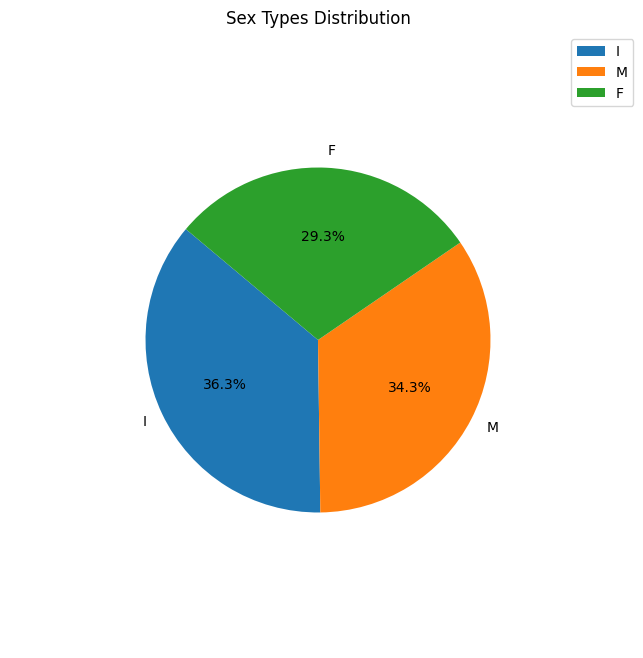

In [25]:
Sex = df.Sex.value_counts()

# Storing labels and sizes into variables
labels = Sex.index.tolist()
sizes = Sex.values.tolist()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, radius=0.7)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))

# Set title
plt.title('Sex Types Distribution')

# Show plot
plt.show()
     

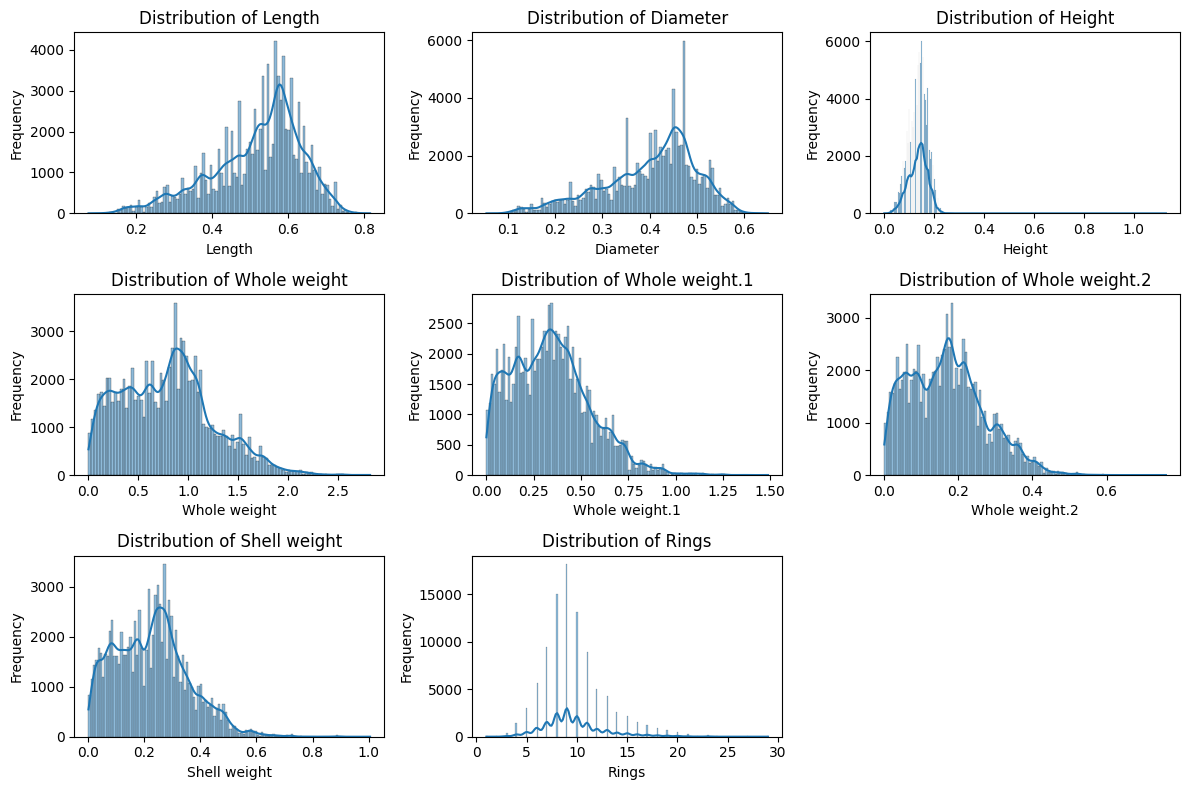

In [26]:
# hist plots for each column

plt.figure(figsize=(12, 8))
for i, column in enumerate(df.drop(columns=['Sex']).columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

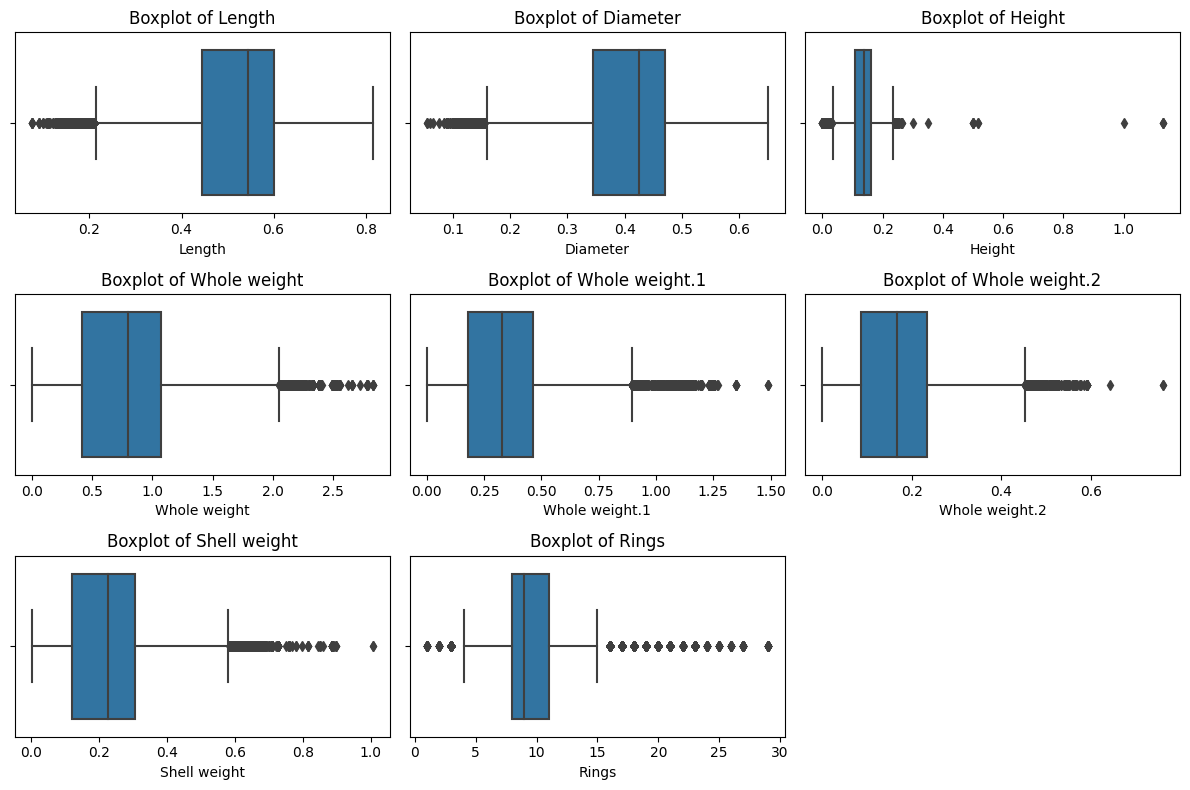

In [27]:
# Box plots for each column

plt.figure(figsize=(12, 8))
for i, column in enumerate(df.drop(columns=['Sex']).columns, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

- There are lots of outliers for each continous columns

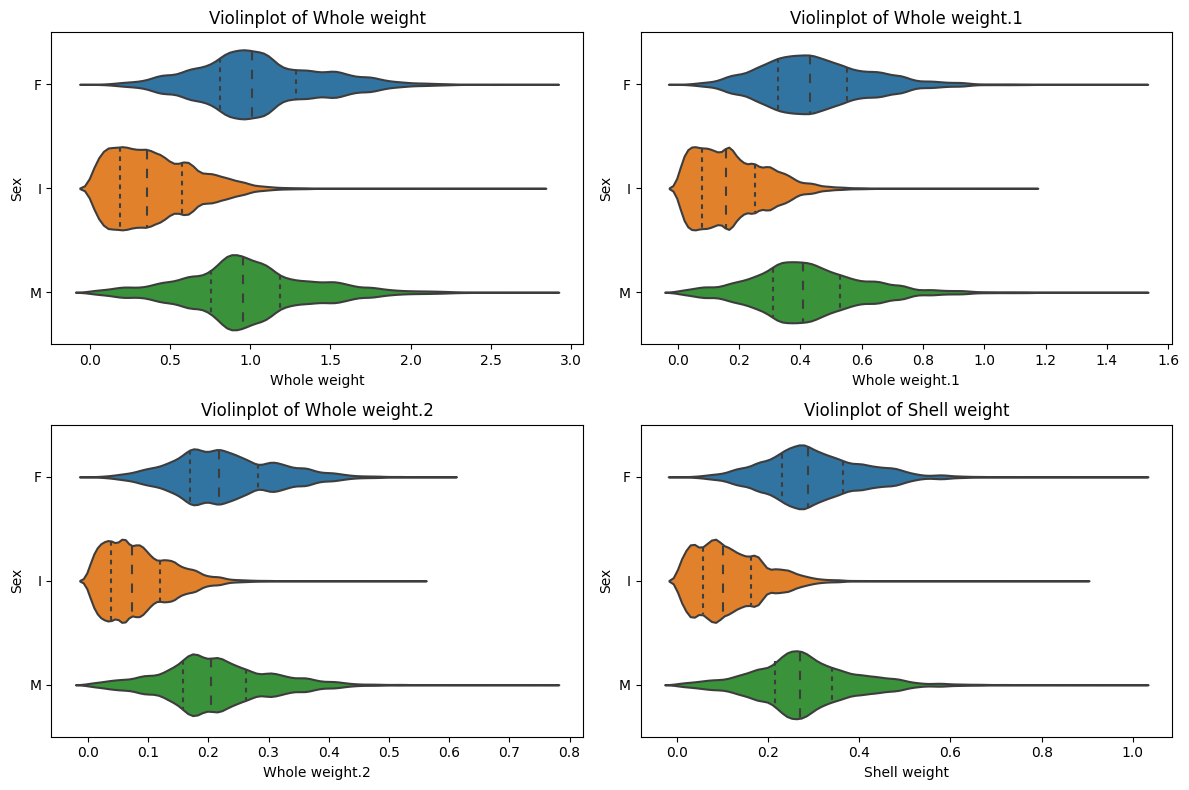

In [28]:
weight_cols = ['Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

# Violin plots for each column

plt.figure(figsize=(12, 8))
for i, column in enumerate(weight_cols, start=1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=df, x=column, y="Sex", split=True, inner="quart")
    plt.title(f'Violinplot of {column}')
    plt.xlabel(column)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

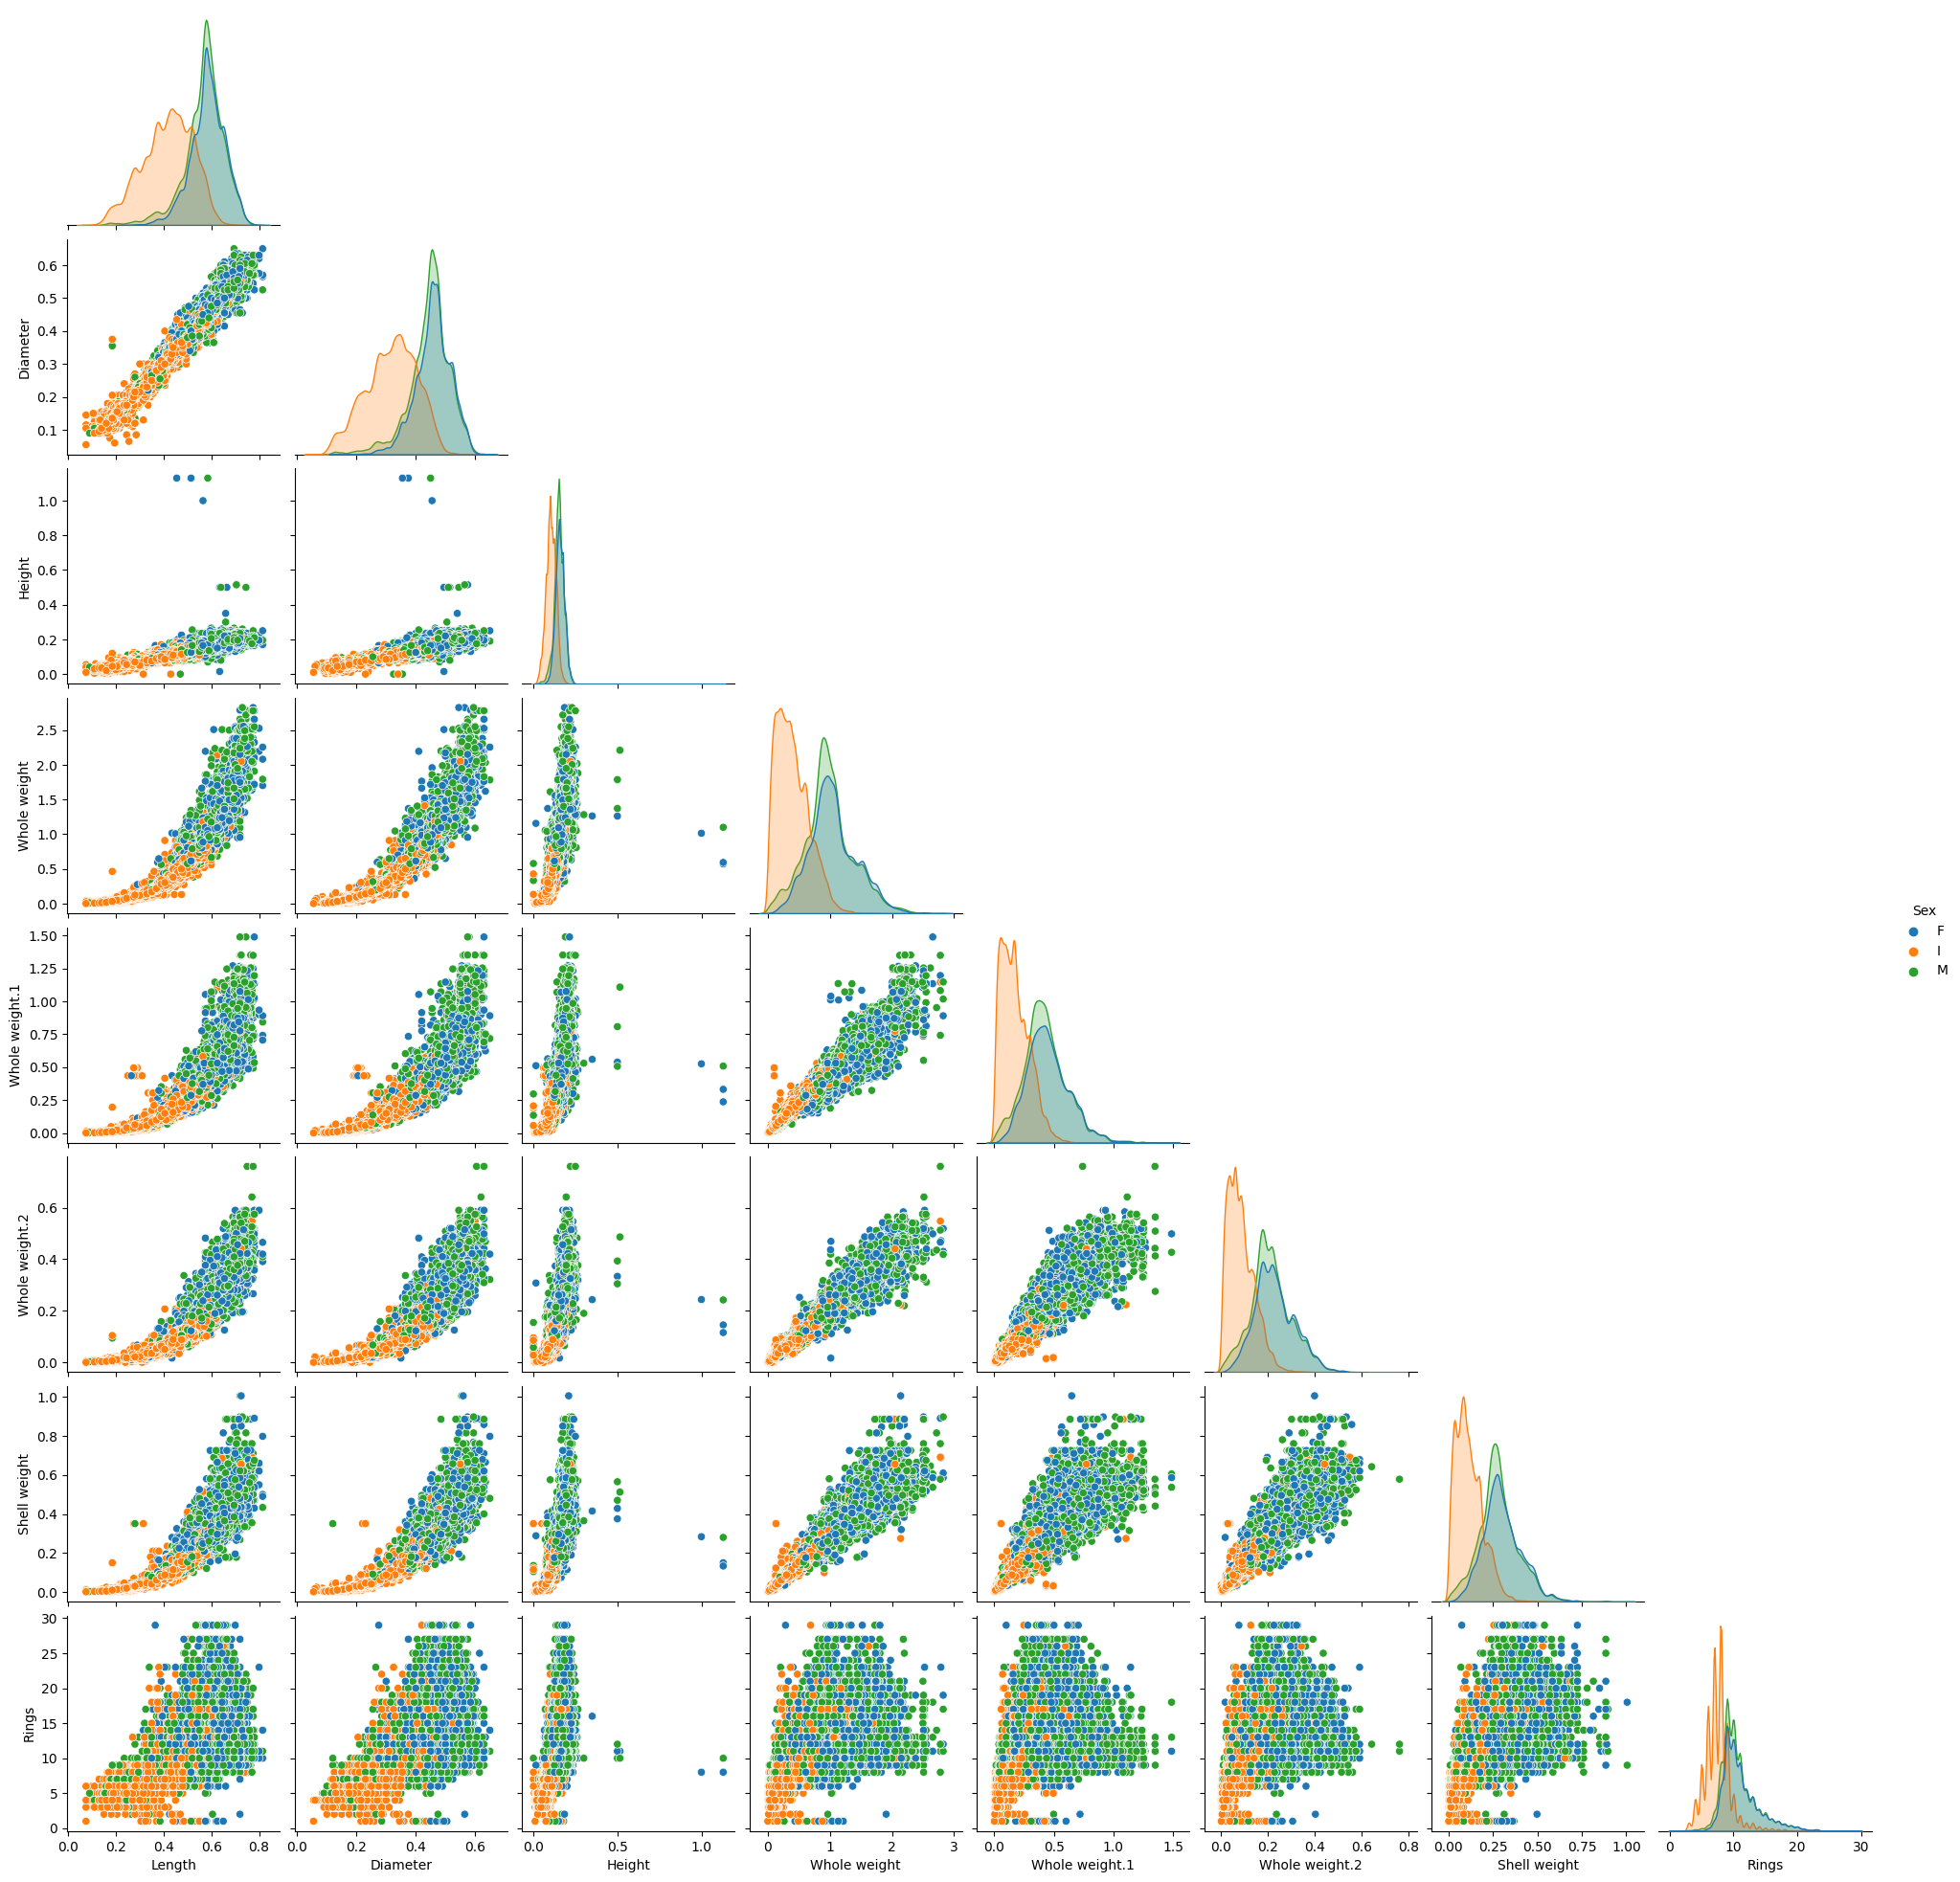

In [29]:
sns.pairplot(df, hue='Sex', corner=True)

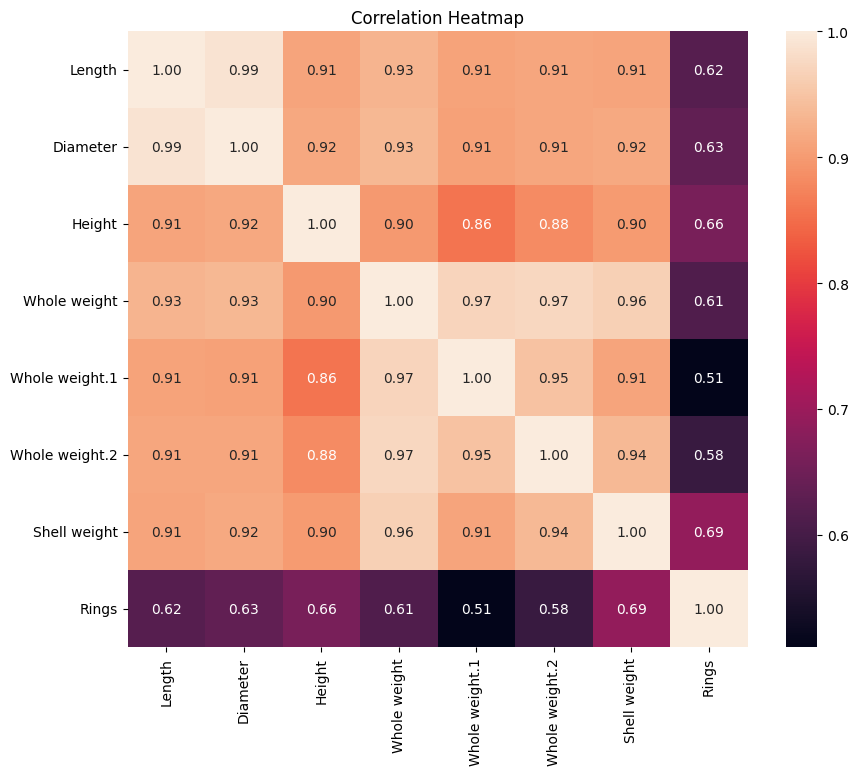

In [30]:
# Create a heatmap
corr = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

<a id='split'></a>
# ✂️ Data spliting

In [31]:
X = df.drop(columns=['Rings'])
y = df.Rings

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [34]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('X_val shape', X_val.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)
print('y_val shape', y_val.shape)

X_train shape (75833, 8)
X_test shape (9479, 8)
X_val shape (9480, 8)
y_train shape (75833,)
y_test shape (9479,)
y_val shape (9480,)


<a id='process'></a>
# 🛠️ Data Preprocessing

- Robust Scaler is used for numerical variables as there are many outliers.
- One Hot Encoder is is used for 'Sex' column.

In [35]:
numerical_cols = X_train.drop(columns=['Sex']).columns.tolist()
categorical_cols = ['Sex']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('one_hot_encoder', OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Length', 'Diameter', 'Height',
                                  'Whole weight', 'Whole weight.1',
                                  'Whole weight.2', 'Shell weight']),
                                ('cat',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex'])])

In [36]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
X_val = preprocessor.transform(X_val)

In [37]:
X_train.head()

,num__Length,num__Diameter,num__Height,num__Whole weight,num__Whole weight.1,num__Whole weight.2,num__Shell weight,cat__Sex_I,cat__Sex_M
87107,-2.258199,-2.209917,-2.102044,-1.566260,-1.531515,-1.453820,-1.561843,1.0,0.0
50247,1.711908,1.865902,1.545981,2.252831,2.938725,2.017401,1.569559,0.0,1.0
30634,1.289556,1.203581,1.024835,1.341036,1.302559,1.622944,1.221200,0.0,1.0
60837,0.951674,0.541261,0.373402,0.590275,0.830213,0.064839,0.179951,0.0,1.0
74195,1.500732,1.509268,1.545981,3.007944,2.035425,2.461165,2.227996,0.0,1.0


<a id='xgb'></a>
# 🚀 XGBoost

In [38]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 0.9, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.6, 0.9, 0.1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-10, 100),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-10, 100),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'gamma': trial.suggest_loguniform('gamma', 1e-10, 100),
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear'])
    }
    
    xgb_reg = XGBRegressor(**params, random_state=42, device="cuda", verbosity=0)
    
    model = TransformedTargetRegressor(
        regressor=xgb_reg,
        func=np.log1p,
        inverse_func=np.expm1)
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    
    y_pred = model.predict(X_val)
    
    return mean_squared_log_error(y_val, y_pred, squared=False)


study_xgb = optuna.create_study(direction='minimize', study_name = 'XGBoost')
study_xgb.optimize(objective, n_trials=100)

xgb_best_params = study_xgb.best_params
xgb_best_score = study_xgb.best_value

In [39]:
print("Best parameters:", xgb_best_params)
print("Best score (msle):", xgb_best_score)

Best parameters: {'n_estimators': 700, 'max_depth': 6, 'learning_rate': 0.052072385811244244, 'subsample': 0.9, 'colsample_bytree': 0.8, 'reg_alpha': 7.319597949075704e-06, 'reg_lambda': 14.978507966075888, 'min_child_weight': 2, 'gamma': 7.039386422366338e-07, 'booster': 'gbtree'}
Best score (msle): 0.1519195216985829


In [40]:
tuned_xgb_reg = XGBRegressor(
    **xgb_best_params, 
    device="cuda", verbosity=0)

best_xgb_model = TransformedTargetRegressor(
    regressor=tuned_xgb_reg,
    func=np.log1p,
    inverse_func=np.expm1)

best_xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=XGBRegressor(base_score=None,
                                                  booster='gbtree',
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=0.8,
                                                  device='cuda',
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=7.039386422366338e-07,
                                                  grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=0.052072385811244244,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=6, max_leaves=None,
                                                  min_child_weight=2,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=700, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...))

In [41]:
y_pred = best_xgb_model.predict(X_test)
xgb_score = mean_squared_log_error(y_test, y_pred, squared=False)
print('RMSLE(XGBoost): ', xgb_score)

RMSLE(XGBoost):  0.14721060223479782


<a id='cat'></a>
# 🐱🚀 Catboost

In [42]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-10, 100),
        'bootstrap_type': 'Poisson', 
        'task_type': 'GPU',
        'random_state': 42,
    }
    
    catboost_reg = CatBoostRegressor(**params, logging_level='Silent')
    
    model = TransformedTargetRegressor(
        regressor=catboost_reg,
        func=np.log1p,
        inverse_func=np.expm1)
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    
    y_pred = model.predict(X_val)
    
    return mean_squared_log_error(y_val, y_pred, squared=False)


catboost_study = optuna.create_study(direction='minimize', study_name='CatBoost')
catboost_study.optimize(objective, n_trials=100)

catboost_best_params = catboost_study.best_params
catboost_best_score = catboost_study.best_value

In [43]:
print("Best parameters:", catboost_best_params)
print("Best score (msle):", catboost_best_score)

Best parameters: {'n_estimators': 1000, 'learning_rate': 0.19829268777297157, 'max_depth': 6, 'reg_lambda': 46.25417072812401}
Best score (msle): 0.15287226203491508


In [44]:
tuned_catboost_reg = CatBoostRegressor(**catboost_best_params, logging_level='Silent')

best_catboost_model = TransformedTargetRegressor(
    regressor=tuned_catboost_reg,
    func=np.log1p,
    inverse_func=np.expm1)

best_catboost_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=<catboost.core.CatBoostRegressor object at 0x7927202aee30>)

In [45]:
y_pred = best_catboost_model.predict(X_test)
catboost_score = mean_squared_log_error(y_test, y_pred, squared=False)
print('RMSLE(CatBoost): ', catboost_score)

RMSLE(CatBoost):  0.14753778750083946


<a id='light'></a>
# 🔆🌳 LightGBM

In [46]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-10, 100),
        'random_state': 42
    }
    
    lgbm_reg = LGBMRegressor(**params, device='gpu', verbosity=-1)
    
    model = TransformedTargetRegressor(
        regressor=lgbm_reg,
        func=np.log1p,
        inverse_func=np.expm1)
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    
    y_pred = model.predict(X_val)
    
    return mean_squared_log_error(y_val, y_pred, squared=False)


lgbm_study = optuna.create_study(direction='minimize', study_name='lightGBM')
lgbm_study.optimize(objective, n_trials=100)

lgbm_best_params = lgbm_study.best_params
lgbm_best_score = lgbm_study.best_value

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


In [47]:
print("Best parameters:", lgbm_best_params)
print("Best score (msle):", lgbm_best_score)

Best parameters: {'n_estimators': 600, 'learning_rate': 0.1466197900659788, 'max_depth': 6, 'num_leaves': 52, 'reg_lambda': 94.85213331794898}
Best score (msle): 0.1516037660151958


In [48]:
tuned_lightGBM_reg = LGBMRegressor(**lgbm_best_params, device='gpu', verbosity=-1)

best_lightGBM_model = TransformedTargetRegressor(
    regressor=tuned_lightGBM_reg,
    func=np.log1p,
    inverse_func=np.expm1)

best_lightGBM_model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=LGBMRegressor(device='gpu',
                                                   learning_rate=0.1466197900659788,
                                                   max_depth=6,
                                                   n_estimators=600,
                                                   num_leaves=52,
                                                   reg_lambda=94.85213331794898,
                                                   verbosity=-1))

In [49]:
y_pred = best_lightGBM_model.predict(X_test)
lgbm_score = mean_squared_log_error(y_test, y_pred, squared=False)
print('RMSLE(LGBM): ', lgbm_score)

RMSLE(LGBM):  0.14705703336105658


<a id='vote'></a>
# 🤝🤖 Voting Regressor

In [50]:
catboost_reg = CatBoostRegressor(**catboost_best_params, logging_level='Silent', task_type='GPU')
xgb_reg = XGBRegressor(**xgb_best_params, verbosity=0, device='cuda')
lgbm_reg = LGBMRegressor(**lgbm_best_params, verbosity=-1, device='gpu')

In [51]:
def objective_weights(trial):
    weight_cat = trial.suggest_float('weight_cat', 0.0, 1.0)
    weight_xgb = trial.suggest_float('weight_xgb', 0.0, 1.0 - weight_cat)
    weight_lgbm = 1.0 - weight_cat - weight_xgb
    
    voting_reg = TransformedTargetRegressor(
        VotingRegressor([
            ('catboost', catboost_reg),
            ('xgboost', xgb_reg),
            ('lgbm', lgbm_reg)
        ], weights=[weight_cat, weight_xgb, weight_lgbm], verbose=False),
                                                func=np.log1p,
                                                inverse_func=np.expm1
    )
    
    voting_reg.fit(X_train, y_train)
    y_pred = voting_reg.predict(X_val)
    return mean_squared_log_error(y_val, y_pred, squared=False)

study_weights = optuna.create_study(direction='minimize')
study_weights.optimize(objective_weights, n_trials=100)

best_weights = study_weights.best_params
print("Best weights for VotingRegressor:", best_weights)

Best weights for VotingRegressor: {'weight_cat': 0.1258218656929092, 'weight_xgb': 0.25808745821313794}


In [52]:
cat_weight = best_weights['weight_cat']
xgb_weight = best_weights['weight_xgb']
lgbm_weight = 1 - cat_weight - xgb_weight

best_weights['weight_lgbm'] = lgbm_weight

print("Best weights for VotingRegressor:", best_weights)

Best weights for VotingRegressor: {'weight_cat': 0.1258218656929092, 'weight_xgb': 0.25808745821313794, 'weight_lgbm': 0.6160906760939528}


<a id='final'></a>
# 🏆🤖 Final Model

In [53]:
best_voting_reg = TransformedTargetRegressor(VotingRegressor([
        ('catboost', catboost_reg),
        ('xgboost', xgb_reg),
        ('lgbm', lgbm_reg)
    ], weights=[cat_weight, xgb_weight, lgbm_weight], verbose=False), 
                                        func=np.log1p,
                                        inverse_func=np.expm1)
    
best_voting_reg.fit(X_train, y_train)
y_pred = best_voting_reg.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
voting_reg_score = mean_squared_log_error(y_test, best_voting_reg.predict(X_test), squared=False)
print('RMSLE(Voting Regressor) Score: ', voting_reg_score)

MAE:  1.2075316129773486
R2:  0.6684997692459169
RMSLE(Voting Regressor) Score:  0.14676997715176524


<a id='summary'></a>
# 🔍 Models Summary

In [54]:
data = {
    'Model': ['XGBoost', 'CatBoost', 'LightGBM', 'VotingRegressor'],
    'RMSLE': [xgb_score, catboost_score, lgbm_score, voting_reg_score]
}

model_scores = pd.DataFrame(data)

model_scores

,Model,RMSLE
0,XGBoost,0.147211
1,CatBoost,0.147538
2,LightGBM,0.147057
3,VotingRegressor,0.146770


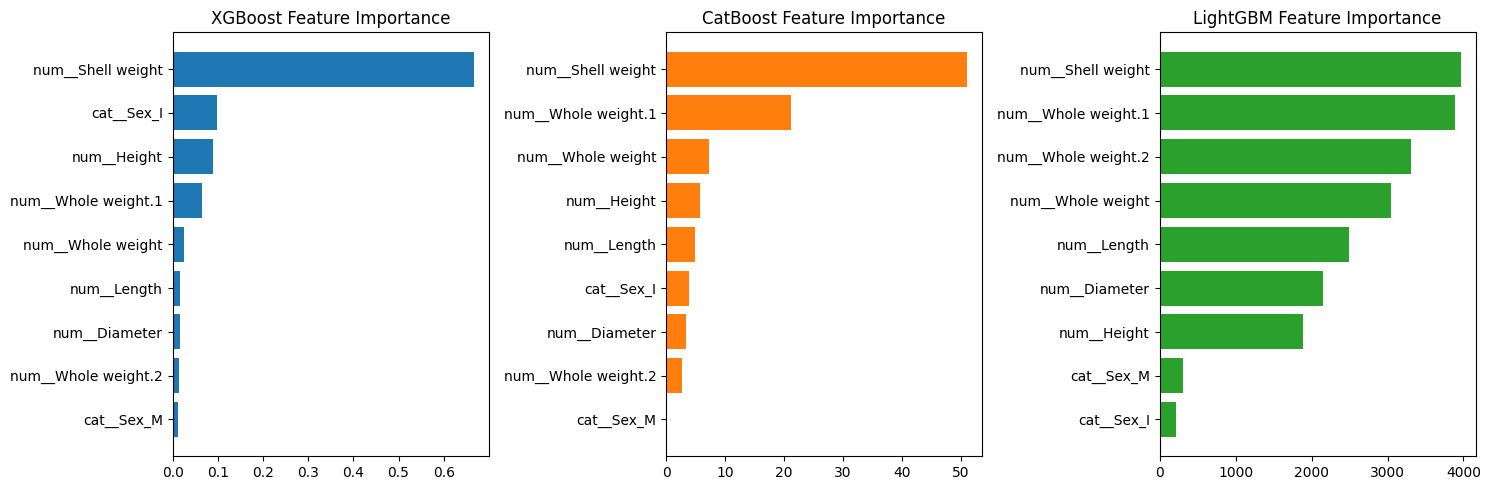

In [55]:
#color palatte
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Get feature importances for each model
xgb_feature_importances = best_xgb_model.regressor_.feature_importances_
catboost_feature_importances = best_catboost_model.regressor_.feature_importances_
lgbm_feature_importances = best_lightGBM_model.regressor_.feature_importances_

# Get feature names
feature_names = X_train.columns

# Zip feature names and importances together, and sort by importances
xgb_feature_importance_sorted = sorted(zip(feature_names, xgb_feature_importances), key=lambda x: x[1])
catboost_feature_importance_sorted = sorted(zip(feature_names, catboost_feature_importances), key=lambda x: x[1])
lgbm_feature_importance_sorted = sorted(zip(feature_names, lgbm_feature_importances), key=lambda x: x[1])

# Unzip the sorted lists
sorted_feature_names_xgb, sorted_xgb_feature_importances = zip(*xgb_feature_importance_sorted)
sorted_feature_names_catboost, sorted_catboost_feature_importances = zip(*catboost_feature_importance_sorted)
sorted_feature_names_lgbm, sorted_lgbm_feature_importances = zip(*lgbm_feature_importance_sorted)

# Create subplots
plt.figure(figsize=(15, 5))

# Plot XGBoost feature importance
plt.subplot(1, 3, 1)
plt.barh(sorted_feature_names_xgb, sorted_xgb_feature_importances, color=color_palette[0])
plt.title('XGBoost Feature Importance')

# Plot CatBoost feature importance
plt.subplot(1, 3, 2)
plt.barh(sorted_feature_names_catboost, sorted_catboost_feature_importances, color=color_palette[1])
plt.title('CatBoost Feature Importance')

# Plot LightGBM feature importance
plt.subplot(1, 3, 3)
plt.barh(sorted_feature_names_lgbm, sorted_lgbm_feature_importances, color=color_palette[2])
plt.title('LightGBM Feature Importance')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


- Shell weight is the best predictor for Abalone age.

In [56]:
submission = pd.DataFrame()
submission["id"] = test_df.index
test_df = preprocessor.transform(test_df)
submission["Rings"] = best_voting_reg.predict(test_df)
submission.to_csv("submission.csv",header=True,index=False)
submission

,id,Rings
0,90615,9.729106
1,90616,9.718109
2,90617,10.003466
3,90618,10.374457
4,90619,7.653240
...,...,...
60406,151021,6.280838
60407,151022,9.520721
60408,151023,12.475941
60409,151024,13.756780
